<h2 align= 'center'><b>TRAINING MODELS</b></h2>

#### **IMPORTING THE LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### **IMPORTING THE DATASET**

In [2]:
!pip install xlrd>=2.0.1

In [2]:
# loading encoded data

data1= pd.read_csv("E:\Employees_performance_analysis\src\models\data_encoded.csv")
data1

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,EmpJobRole_Research Director,EmpJobRole_Research Scientist,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely
0,32,True,10,3,4,55,3,2,4,1,...,False,False,True,False,False,False,False,False,False,True
1,47,True,14,4,4,42,3,2,1,2,...,False,False,True,False,False,False,False,False,False,True
2,40,True,5,4,4,48,2,3,1,5,...,False,False,True,False,False,False,False,False,True,False
3,41,True,10,4,2,73,2,5,4,3,...,False,False,False,False,False,False,False,False,False,True
4,60,True,16,4,1,84,3,2,1,8,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,False,3,1,4,71,4,2,4,1,...,False,False,True,False,False,False,False,False,True,False
1196,37,True,10,2,4,80,4,1,4,3,...,False,False,False,False,True,False,False,False,False,True
1197,50,True,28,1,4,74,4,1,3,1,...,False,False,False,False,True,False,False,False,False,True
1198,34,False,9,3,4,46,2,3,2,1,...,False,False,False,False,False,False,False,False,False,True


#### **DOMAIN ANALYSIS**

1. ***EmpNumber:*** Unique identifier for each employee in the dataset.

2. ***Age:*** Age of the employee, providing insight into workforce demographics and potential correlations with attrition.

3. ***Gender:*** Gender of the employee, which may impact workplace dynamics and attrition patterns.

4. ***EducationBackground:*** The educational background of the employee, influencing skillset and career trajectory.

5. ***MaritalStatus:*** Marital status of the employee, potentially affecting work-life balance and job satisfaction.

6. ***EmpDepartment:*** Department in which the employee works, indicating job role and organizational structure.

7. ***EmpJobRole:*** Specific job role of the employee within their department, reflecting responsibilities and career path.

8. ***BusinessTravelFrequency:*** Frequency of business travel for the employee, impacting lifestyle and job satisfaction.

9. ***DistanceFromHome:*** Distance of employee's residence from the workplace, influencing commuting stress and retention.

10. ***EmpEducationLevel:*** Level of education attained by the employee, reflecting qualifications and potential for advancement.

11. ***EmpEnvironmentSatisfaction:*** Employee satisfaction with the work environment, affecting morale and turnover.

12. ***EmpHourlyRate:*** Hourly wage of the employee, a factor in compensation satisfaction and retention.

13. ***EmpJobInvolvement:*** Level of involvement and engagement in the job role, affecting performance and attrition risk.

14. ***EmpJobLevel:*** Level of hierarchy within the organization, indicating seniority and career progression.

15. ***EmpJobSatisfaction:*** Satisfaction level with the job role, impacting employee morale and retention.

16. ***NumCompaniesWorked:*** Number of companies the employee has previously worked for, indicating job stability and turnover risk.

17. ***OverTime:*** Whether the employee works overtime, influencing work-life balance and burnout.

18. ***EmpLastSalaryHikePercent:*** Percentage of the employee's last salary hike, affecting compensation satisfaction and retention.

19. ***EmpRelationshipSatisfaction:*** Satisfaction with relationships at work, influencing job satisfaction and likelihood of turnover.

20. ***TotalWorkExperienceInYears:*** Total work experience of the employee, influencing skill level and career trajectory.

21. ***TrainingTimesLastYear:*** Number of training sessions attended by the employee last year, indicating investment in skill development and career growth.

22. ***EmpWorkLifeBalance:*** Employee's perceived balance between work and personal life, affecting job satisfaction and retention.

23. ***ExperienceYearsAtThisCompany:*** Years of experience at the current company, indicating loyalty and potential for promotion.

24. ***ExperienceYearsInCurrentRole:*** Years of experience in the current job role, influencing expertise and potential for advancement.

25. ***YearsSinceLastPromotion:*** Time since the employee's last promotion, impacting career progression and job satisfaction.

26. ***YearsWithCurrManager:*** Years of tenure with the current manager, affecting job satisfaction and retention.

27. ***Attrition:*** This variable indicates whether the employee has left the company  or not.

28. ***PerformanceRating:*** Target variable for the given problem.  this is the performance rating assigned to the employee, influencing career development and potential for retention.

#### **FEATURES SELECTION**

##### **CHECKING PEARSON'S CORRELATION COEFFICIENT**

In [3]:
# fetching only continuous columns
# considering the previous assumption made in data exploratory part such that features with >=20 unique values are taken as continuous features
for column in data1.columns:
    if data1[column].nunique() >= 20:
        print(f'{column}: {data1[column].nunique()}')
        print("===================================================")              

Age: 43
DistanceFromHome: 29
EmpHourlyRate: 71
TotalWorkExperienceInYears: 29
ExperienceYearsAtThisCompany: 21


In [4]:
continuous_columns= data1[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]

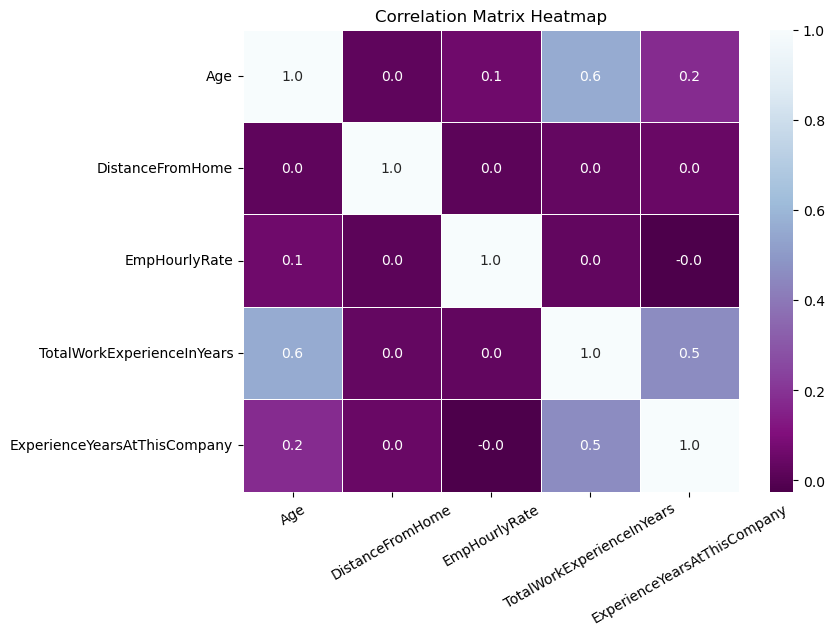

In [5]:
correlation_matrix = continuous_columns.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
h= sns.heatmap(correlation_matrix, annot=True, cmap="BuPu_r", fmt=".1f", linewidths=0.5)
h.set_xticklabels(h.get_xticklabels(), rotation= 30)
plt.title("Correlation Matrix Heatmap")
plt.show()

##### Insights:
- All the continuous input features have less multi-collinearity among each other.
- Only the features **"TotalWorkExperienceInYears" and "Age"** are showing slightly higher correlation of above 0.5.
- So one of them could be removed, but **it would be better to consider their correlation with the target variable** before dropping of these features. 

##### **ANOVA TEST**

##### (Between continuous predictors and the categorical target variable)

In [15]:
# Defining a function to find the statistical relationship between target and the continuous input variables

def Anova(data, target, input_features):
  from scipy.stats import f_oneway

  # creating empty list to store the final selected input feaatures
  selected_input_features= []

  for column in input_features:
    features_group_list= data1.groupby(target)[column].apply(list)
    anova_result= f_oneway(*features_group_list)

    # If anova p-value is <0.05, we reject H0 and hence it will be taken as significant feature.

    if anova_result[1] < 0.05:
      print(f'- {column} IS CORRELATED with the {target}| p-value: {anova_result[1]}')
      print("==================================================================================================")
      selected_input_features.append(column)
    else:
      print(f'- {column} IS NOT CORRELATED with {target}| p-value: {anova_result[1]}')
      print("==================================================================================================")

  return(selected_input_features)

In [16]:
# calling the function to check which continuous variables are correlated with the target

print("ANOVA RESULTS:\n")
Anova(data1, 'PerformanceRating', input_features= ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany'])

ANOVA RESULTS:

- Age IS NOT CORRELATED with PerformanceRating| p-value: 0.3150808268898886
- DistanceFromHome IS NOT CORRELATED with PerformanceRating| p-value: 0.2786929213897704
- EmpHourlyRate IS NOT CORRELATED with PerformanceRating| p-value: 0.23633206407690707
- TotalWorkExperienceInYears IS CORRELATED with the PerformanceRating| p-value: 0.0028670488207405654
- ExperienceYearsAtThisCompany IS CORRELATED with the PerformanceRating| p-value: 3.8123602402513167e-06


['TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']

#### Insights:
- From the ANOVA  test, it is clear that among the continous predictors, only **TotalWorkExperienceInYears** and **ExperienceYearsAtThisCompany** are in high correlation with the target variable.
- Hence, columns like **Age, DistanceFromHome, EmpHourlyRate** are not correlated with the target variable.
- Hence these could be dropped.

##### **CHI-SQUARE TEST**

#### **SCALING**

In [54]:
# creaating a copy of encoded_data for scaling
# mm_scaled_data-->MinMax scaled data

mm_scaled_data= encoded_data.copy()
mm_scaled_data.head()


,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,Travel_Frequently,Travel_Rarely
0,32,True,10,3,4,55,3,2,4,1,...,False,False,True,False,False,False,False,False,False,True
1,47,True,14,4,4,42,3,2,1,2,...,False,False,True,False,False,False,False,False,False,True
2,40,True,5,4,4,48,2,3,1,5,...,False,False,True,False,False,False,False,False,True,False
3,41,True,10,4,2,73,2,5,4,3,...,False,False,False,False,False,False,False,False,False,True
4,60,True,16,4,1,84,3,2,1,8,...,False,False,True,False,False,False,False,False,False,True


In [56]:
# fetching only continuous columns for scaling

continuous_col.columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate',
       'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany'],
      dtype='object')

In [57]:
# using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaling= MinMaxScaler()
mm_scaled_data[['Age','DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']]= scaling.fit_transform(mm_scaled_data[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany']])


In [58]:
mm_scaled_data.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,Travel_Frequently,Travel_Rarely
0,0.333333,True,0.321429,3,4,0.357143,3,2,4,1,...,False,False,True,False,False,False,False,False,False,True
1,0.690476,True,0.464286,4,4,0.171429,3,2,1,2,...,False,False,True,False,False,False,False,False,False,True
2,0.523810,True,0.142857,4,4,0.257143,2,3,1,5,...,False,False,True,False,False,False,False,False,True,False
3,0.547619,True,0.321429,4,2,0.614286,2,5,4,3,...,False,False,False,False,False,False,False,False,False,True
4,1.000000,True,0.535714,4,1,0.771429,3,2,1,8,...,False,False,True,False,False,False,False,False,False,True


#### **BALANCING THE DATASET**

In [59]:
# splitting X and y
X= mm_scaled_data.drop('PerformanceRating', axis=1)
y= mm_scaled_data['PerformanceRating']

In [60]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state= 42)

In [61]:
# importing SMOTE--> oversampling technique
from imblearn.over_sampling import SMOTE
smote= SMOTE()
X_train_sm, y_train_sm= smote.fit_resample(X_train, y_train)


In [62]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({3: 699, 2: 155, 4: 106})
Counter({3: 699, 2: 699, 4: 699})


### **FEATURE ENGINEERING**

In [71]:
# Statistical measurement of relationship between the variables

In [63]:
# copying the mm_scaled data into a new variable --> final dataset for modeling
processed_data= mm_scaled_data.copy()
processed_data.head()

,Age,Gender,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,...,Research Director,Research Scientist,Sales Executive,Sales Representative,Senior Developer,Senior Manager R&D,Technical Architect,Technical Lead,Travel_Frequently,Travel_Rarely
0,0.333333,True,0.321429,3,4,0.357143,3,2,4,1,...,False,False,True,False,False,False,False,False,False,True
1,0.690476,True,0.464286,4,4,0.171429,3,2,1,2,...,False,False,True,False,False,False,False,False,False,True
2,0.523810,True,0.142857,4,4,0.257143,2,3,1,5,...,False,False,True,False,False,False,False,False,True,False
3,0.547619,True,0.321429,4,2,0.614286,2,5,4,3,...,False,False,False,False,False,False,False,False,False,True
4,1.000000,True,0.535714,4,1,0.771429,3,2,1,8,...,False,False,True,False,False,False,False,False,False,True


In [65]:
processed_data['PerformanceRating'].shape

(1200,)

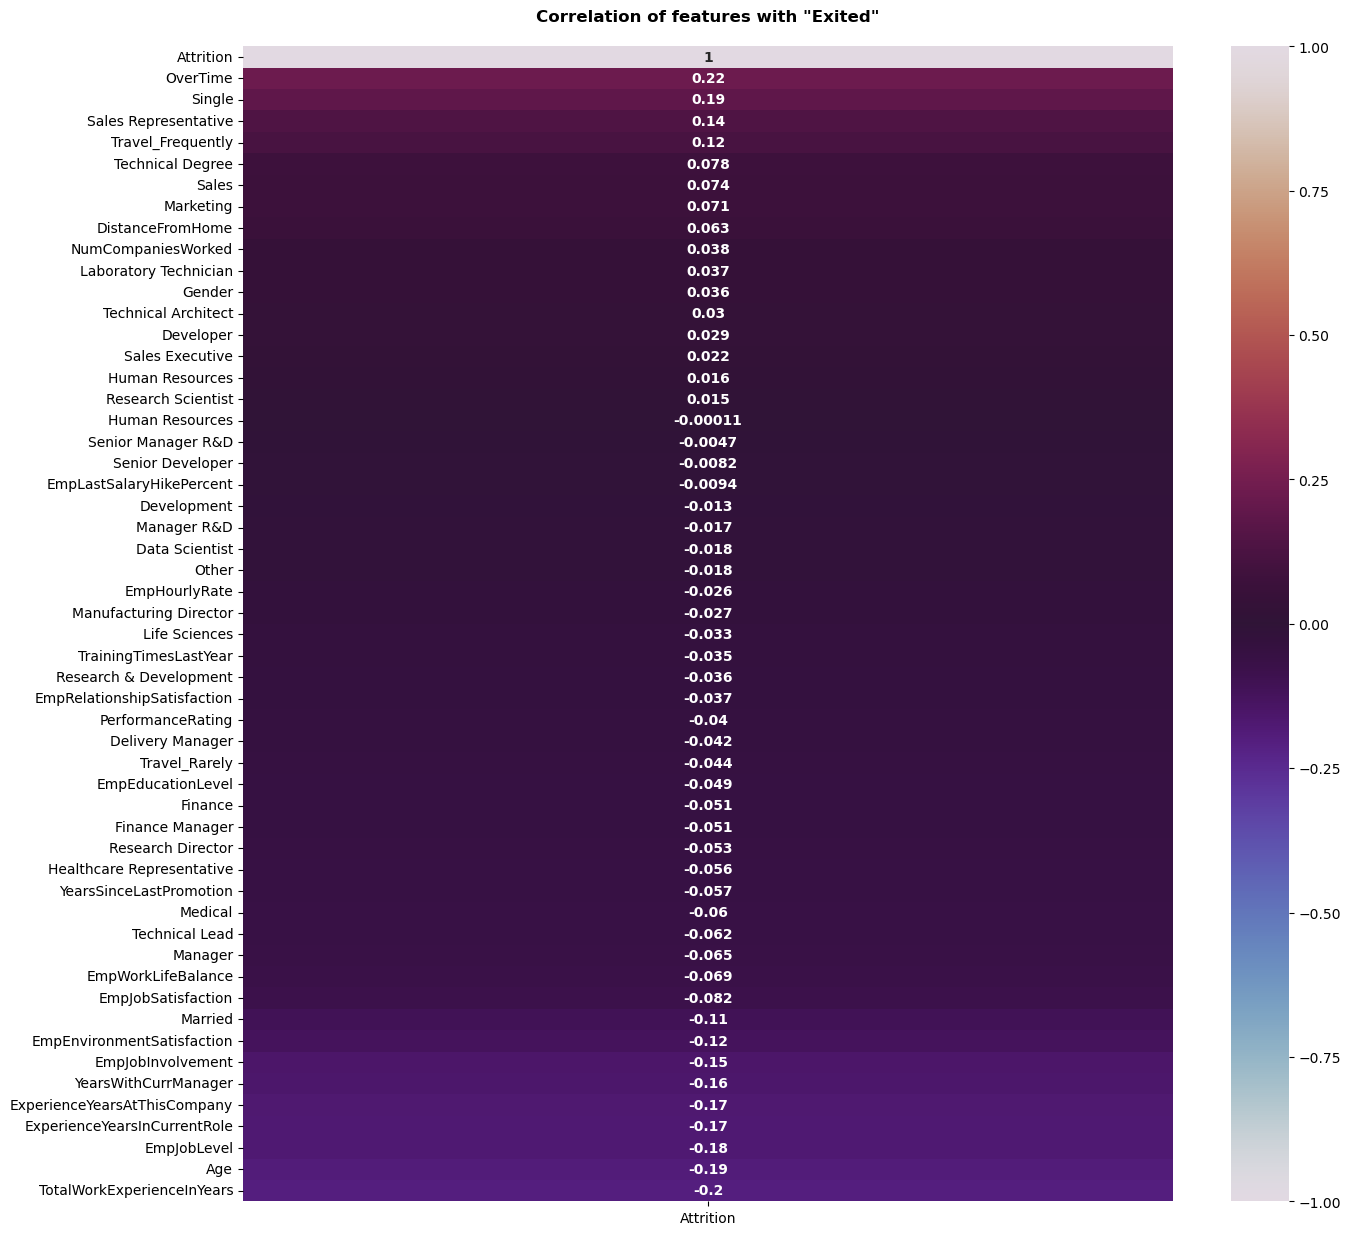

In [155]:
plt.figure(figsize= (15, 15), dpi= 100)
heatmap= sns.heatmap(data.corr()[['Attrition']].sort_values(by= 'Attrition', ascending= False),
                     vmin= -1, vmax = 1, annot= True, cmap= 'twilight')

# Looping through the text elements and setting the font weight to bold
for text in heatmap.texts:
    text.set_fontweight('bold')

heatmap.set_title('Correlation of features with "Exited"', fontsize= 12, pad= 18, fontweight= 'bold')
plt.show()

##### Insights:
- Most of the features show correlation close to 0 but dropping all of them might lead to loss of information.
- Hence no column is dropped here.

### **MODEL BUILDING**:

#### **LOGISTIC REGRESSION**

In [156]:
# Splitting features and target variable

X= data.drop('Attrition', axis= 1)
y= data[['Attrition']]

In [157]:
#Checking the shape of X and y

print(f'X: {X.shape}\ny: {y.shape}')

X: (1200, 53)
y: (1200, 1)


In [158]:
# finding the best test size

# Array of test size values from 0.2 to 0.3
test_size= np.arange(start=0.2, stop= 0.35, step= 0.05)

#importing the required libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Initialising a list to store the score of each test size
score= []

for size in test_size:
  X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, stratify=y, test_size= size, random_state=0)
  lg_reg= LogisticRegression()
  lg_reg.fit(X_train1, y_train1)
  score.append(lg_reg.score(X_test1, y_test1))

# Creating a dataframe to display the results
l= pd.DataFrame({'Test size': test_size, 'Score': score })
l.sort_values(by=['Score'], ascending = False, inplace = True)
l.style.highlight_max(color='cornflowerblue')


,Test size,Score
0,0.200000,0.891667
2,0.300000,0.891667
1,0.250000,0.890000


Hence the test size of all three options turned out to be the better ones for **Logistic Regression model**

#### ***Train Test Split***

In [159]:
# Splitting x and y into training and testing sets
X_train1, X_test1, y_train1, y_test1= train_test_split(X, y, stratify=y, test_size= 0.3, random_state=0)

In [160]:
# Checking the shape
print(f'X_train shape: {X_train1.shape}\nX_test shape: {X_test1.shape}')
print(f'y_train shape: {y_train1.shape}\ny_test shape: {y_test1.shape}')

X_train shape: (840, 53)
X_test shape: (360, 53)
y_train shape: (840, 1)
y_test shape: (360, 1)


#### ***Training the Logistic Regression model***

In [161]:
# Initializing the model
lg_model= LogisticRegression()

# fitting the model to the train data
lg_model.fit(X_train1, y_train1)

LogisticRegression()

#### ***Prediction***

In [162]:
y_pred= lg_model.predict(X_test1)

#### ***Model Evaluation:***

In [163]:
# Checking Accuracy score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
a= accuracy_score(y_test1, y_pred)
print(f'Model accuracy score: {a}')

Model accuracy score: 0.8916666666666667


In [164]:
print(f'Precision score: {precision_score(y_test1, y_pred)}\
        \nRecall score: {recall_score(y_test1, y_pred)}\
        \nf1 score: {f1_score(y_test1, y_pred)}')

Precision score: 0.7692307692307693        
Recall score: 0.37735849056603776        
f1 score: 0.5063291139240507


In [165]:
# Checking for overfitting and underfitting

Training_accuracy= lg_model.score(X_train1, y_train1)
Testing_accuracy= lg_model.score(X_test1, y_test1)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')


Training set score: 0.9035714285714286
Testing set score: 0.8916666666666667


The **training set accuracy** is **0.90** whereas the **testing set accuracy** is **0.89**. Hence the model is not that much overfitted.

In [167]:
# K-Fold Cross-validation

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kf= KFold(n_splits= 10, shuffle= False)

In [168]:
# cross validation accuracy

score= cross_val_score(lg_model, X, y, cv= kf, scoring= 'accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.84166667 0.85833333 0.90833333 0.86666667 0.925      0.925
 0.91666667 0.90833333 0.875      0.9       ]


In [169]:
LG_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
LG_acc

,CV mean,Std
Cross validation accuracy,0.8925,0.028247


- The **mean cross validation** of the model is 0.89 which shows that the model is expected to be around **89%** accurate on average.
- **10 fold cross validation** accuracy does not show any significant improvement in the model's performance.

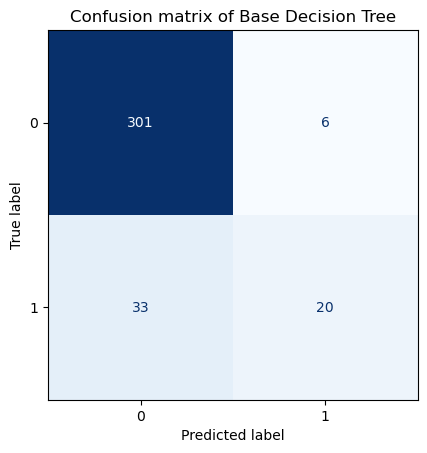

In [171]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lg_model, X_test1, y_test1, colorbar= False, cmap= 'Blues')
plt.title('Confusion matrix of Base Decision Tree')
plt.grid(False)

In [172]:
# classification report

print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       307
           1       0.77      0.38      0.51        53

    accuracy                           0.89       360
   macro avg       0.84      0.68      0.72       360
weighted avg       0.88      0.89      0.88       360



In [173]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):


  result= pd.DataFrame(data= [accuracy_score(y_test, y_pred),
                              precision_score(y_test, y_pred),
                              recall_score(y_test, y_pred),
                              f1_score(y_test, y_pred)],
                       index=['Accuracy','precision','Recall', 'F1-score'],
                       columns= [model_name])
  return result


In [174]:
Base_lg_result= metrics_calculator(y_test1, y_pred, 'Base Logistic Regression')
Base_lg_result

,Base Logistic Regression
Accuracy,0.891667
precision,0.769231
Recall,0.377358
F1-score,0.506329


In [175]:
# saving it in a different dataframe for model conclusion report

Base_lg_result1= pd.DataFrame(data= [0.891667, 0.769231, 0.377358, 0.506329], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Base Decision Tree'])
Base_lg_result1.style.background_gradient(cmap= 'Blues')

,Base Decision Tree
Accuracy,0.891667
precision,0.769231
Recall,0.377358
F1-score,0.506329


#### **TUNING LOGISTIC REGRESSION HYPERPARAMETERS USING GRID SEARCH CV**

#### ***Finding optimal hyper parameters(GridSearchCV)***

In [176]:
# Defining model
model = LogisticRegression()

# Defining evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state= 0)

# Defining search parameters
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.001, 0.01, 0.1, 1, 10, 100]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [100, 200, 300, 400, 500]

param_grid= {'penalty': penalty, 'C': C, 'solver': solver, 'max_iter': max_iter}

# Defining search
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(model, param_grid, scoring= 'accuracy', n_jobs= -1, cv= cv)

# Executing search
GridSearchCV = search.fit(X_train1, y_train1)

# Setting the classifier to the best combination of parameters
tuned_lg_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters: ', GridSearchCV.best_params_)

Best Score:  0.8908730158730159
Best hyperparameters:  {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}


#### ***Tuned Logistic Regression Model***

In [177]:
# Training the tuned model

tuned_lg_model_cv.fit(X_train1, y_train1)

LogisticRegression(C=1, max_iter=200)

In [178]:
# prediction

y_pred= tuned_lg_model_cv.predict(X_test1)

In [179]:
# Tuned model evaluation

# Accuracy score

print(f'Tuned DT model accuracy score:\n {accuracy_score(y_test1, y_pred)}')

Tuned DT model accuracy score:
 0.8888888888888888


In [180]:
print(f'Precision score: {precision_score(y_test1, y_pred)}\
        \nRecall score: {recall_score(y_test1, y_pred)}\
        \nf1 score: {f1_score(y_test1, y_pred)}')

Precision score: 0.76        
Recall score: 0.3584905660377358        
f1 score: 0.48717948717948717


In [181]:
# Checking for overfitting and underfitting

Training_accuracy= tuned_lg_model_cv.score(X_train1, y_train1)
Testing_accuracy= tuned_lg_model_cv.score(X_test1, y_test1)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.9071428571428571
Testing set score: 0.8888888888888888


#### Insights:
- After tuning also, the training score is not reduced and is worse than the base logistic regression model.

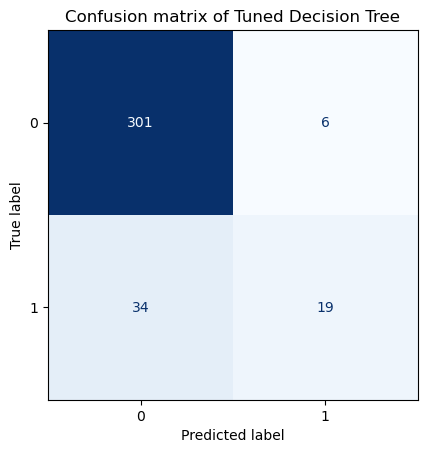

In [183]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(tuned_lg_model_cv, X_test1, y_test1, colorbar= False, cmap= 'Blues')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)


In [184]:
# tuned model classification report

print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       307
           1       0.76      0.36      0.49        53

    accuracy                           0.89       360
   macro avg       0.83      0.67      0.71       360
weighted avg       0.88      0.89      0.87       360



In [185]:
# tuned model performance metrics

tuned_lg_result= metrics_calculator(y_test1, y_pred, 'Tuned Logistic Regression')
tuned_lg_result

,Tuned Logistic Regression
Accuracy,0.888889
precision,0.760000
Recall,0.358491
F1-score,0.487179


In [186]:
# saving it in a different dataframe for model conclusion report
tuned_dt_result1= pd.DataFrame(data= [0.888889, 0.760000, 0.358491, 0.487179],                            
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned Logistic Regression'])
tuned_dt_result1.style.background_gradient(cmap= 'Blues')

,Tuned Logistic Regression
Accuracy,0.888889
precision,0.760000
Recall,0.358491
F1-score,0.487179


### **DECISION TREE:**

In [187]:
# Splitting features and target variable

X= data.drop('Attrition', axis= 1)
y= data[['Attrition']]

In [188]:
#Checking the shape of X and y

print(f'X: {X.shape}\ny: {y.shape}')

X: (1200, 53)
y: (1200, 1)


In [190]:
# finding the best test size

# Array of test size values from 0.2 to 0.3
test_size= np.arange(start=0.2, stop= 0.35, step= 0.05)

#importing the required libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#Initialising a list to store the score of each test size
score= []

for size in test_size:
  X_train2, X_test2, y_train2, y_test2= train_test_split(X, y, stratify = y, test_size= size, random_state=0)
  dt_clf= DecisionTreeClassifier()
  dt_clf.fit(X_train2, y_train2)
  score.append(dt_clf.score(X_test2, y_test2))

# Creating a dataframe to display the results
d= pd.DataFrame({'Test size': test_size, 'Score': score })
d.sort_values(by=['Score'], ascending = False, inplace = True)
d.style.highlight_max(color='limegreen')


,Test size,Score
0,0.200000,0.800000
1,0.250000,0.796667
2,0.300000,0.758333


Hence the test size of **0.2** is the better one for **Decision Tree modeling**.

#### ***Train Test Split***

In [191]:
# Splitting x and y into training and testing sets
X_train2, X_test2, y_train2, y_test2= train_test_split(X, y, stratify=y, test_size= 0.2, random_state=0)

In [192]:
# Checking the shape
print(f'X_train shape: {X_train2.shape}\nX_test shape: {X_test2.shape}')
print(f'y_train shape: {y_train2.shape}\ny_test shape: {y_test2.shape}')

X_train shape: (960, 53)
X_test shape: (240, 53)
y_train shape: (960, 1)
y_test shape: (240, 1)


#### ***Training the Decision tree model***

In [193]:
# Initializing the model
dt_model= DecisionTreeClassifier()

# fitting the model to the train data
dt_model.fit(X_train2, y_train2)

DecisionTreeClassifier()

In [194]:
# prediction
y_pred= dt_model.predict(X_test2)

In [195]:
# Model evaluation

# Checking Accuracy score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
a= accuracy_score(y_test2, y_pred)
print(f'Model accuracy score: {a}')


Model accuracy score: 0.8291666666666667


In [198]:
print(f'Precision score: {precision_score(y_test2, y_pred)}\
        \nRecall score: {recall_score(y_test2, y_pred)}\
        \nf1 score: {f1_score(y_test2, y_pred)}')

Precision score: 0.43243243243243246        
Recall score: 0.4444444444444444        
f1 score: 0.4383561643835616


In [199]:
# Checking for overfitting and underfitting

Training_accuracy= dt_model.score(X_train2, y_train2)
Testing_accuracy= dt_model.score(X_test2, y_test2)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 1.0
Testing set score: 0.8291666666666667


The **training set accuracy** is **1.0** whereas the **testing set accuracy** is **0.82**. Clearly the model is overfitted.

In [200]:
# K-Fold Cross-validation

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kf= KFold(n_splits= 10, shuffle= False)

In [201]:
# cross validation accuracy

score= cross_val_score(dt_model, X, y, cv= kf, scoring= 'accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.78333333 0.83333333 0.76666667 0.85833333 0.85833333 0.825
 0.79166667 0.775      0.825      0.83333333]


In [202]:
DT_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
DT_acc

,CV mean,Std
Cross validation accuracy,0.815,0.031798


- The **mean cross validation** of the model is 0.81 which shows that the model is expected to be around **81%** accurate on average.
- **10 fold cross validation** accuracy does not show any significant improvement in the model's performance.

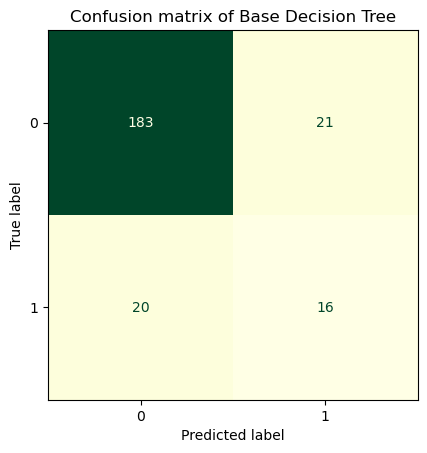

In [203]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt_model, X_test2, y_test2, colorbar= False, cmap= 'YlGn')
plt.title('Confusion matrix of Base Decision Tree')
plt.grid(False)

In [204]:
# classification report

print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       204
           1       0.43      0.44      0.44        36

    accuracy                           0.83       240
   macro avg       0.67      0.67      0.67       240
weighted avg       0.83      0.83      0.83       240



In [205]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):


  result= pd.DataFrame(data= [accuracy_score(y_test, y_pred),
                              precision_score(y_test, y_pred),
                              recall_score(y_test, y_pred),
                              f1_score(y_test, y_pred)],
                       index=['Accuracy','precision','Recall', 'F1-score'],
                       columns= [model_name])
  return result


In [206]:
Base_dt_result= metrics_calculator(y_test2, y_pred, 'Base Decision Tree')
Base_dt_result

,Base Decision Tree
Accuracy,0.829167
precision,0.432432
Recall,0.444444
F1-score,0.438356


In [208]:
# saving it in a different dataframe for model conclusion report

Base_dt_result1= pd.DataFrame(data= [0.829167, 0.432432, 0.444444, 0.438356], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Base Decision Tree'])
Base_dt_result1.style.background_gradient(cmap= 'YlGn')

,Base Decision Tree
Accuracy,0.829167
precision,0.432432
Recall,0.444444
F1-score,0.438356


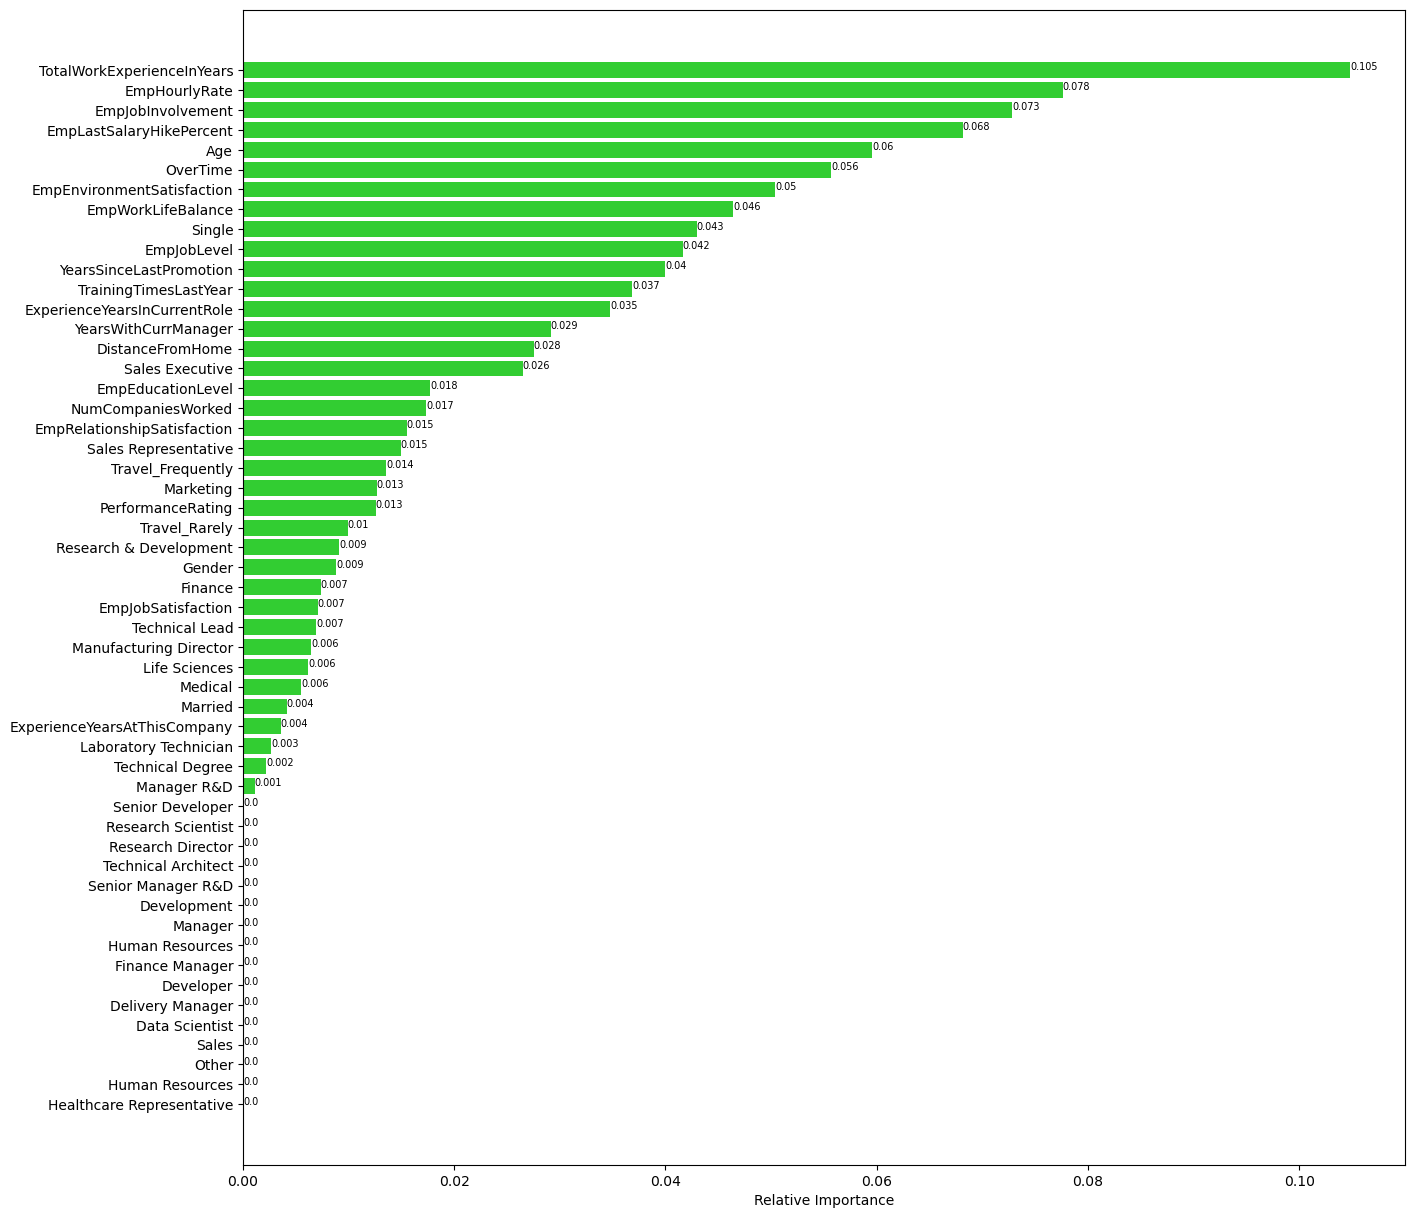

In [212]:
# feature importance

# getting feature importances from the decision tree model
importances= dt_model.feature_importances_
feature_names= X.columns

# sorting the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'limegreen', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

#### **TUNING DECISION TREE HYPERPARAMETERS USING GRID SEARCH CV**

#### ***Finding optimal hyper parameters(GridSearchCV)***

In [213]:
# Defining model
model = DecisionTreeClassifier()

# Defining evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state= 0)

# Defining search parameters
max_depth= range(2, 20)
criterion= ['entropy', 'gini']
min_samples_split= [2, 3, 4]
min_samples_leaf= [1, 2, 3]

param_grid= {'max_depth': max_depth, 'criterion': criterion, 'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf}

# Defining search
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(model, param_grid, scoring= 'accuracy', n_jobs= -1, cv= cv)

# Executing search
GridSearchCV = search.fit(X_train2, y_train2)

# Setting the classifier to the best combination of parameters
tuned_dt_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters: ', GridSearchCV.best_params_)

Best Score:  0.8552083333333333
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### ***Tuned Decision Tree Model***

In [214]:
# Training the tuned model

tuned_dt_model_cv.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [215]:
# prediction

y_pred= tuned_dt_model_cv.predict(X_test2)

In [216]:
# Tuned model evaluation
# Accuracy score

print(f'Tuned DT model accuracy score:\n {accuracy_score(y_test2, y_pred)}')

Tuned DT model accuracy score:
 0.8541666666666666


In [218]:
print(f'Precision score: {precision_score(y_test2, y_pred)}\
        \nRecall score: {recall_score(y_test2, y_pred)}\
        \nf1 score: {f1_score(y_test2, y_pred)}')

Precision score: 0.5217391304347826        
Recall score: 0.3333333333333333        
f1 score: 0.4067796610169491


In [219]:
# Checking for overfitting and underfitting

Training_accuracy= tuned_dt_model_cv.score(X_train2, y_train2)
Testing_accuracy= tuned_dt_model_cv.score(X_test2, y_test2)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.8947916666666667
Testing set score: 0.8541666666666666


#### Insights:
- After tuning, the training score is drastically reduced and significantly closer to testing score.

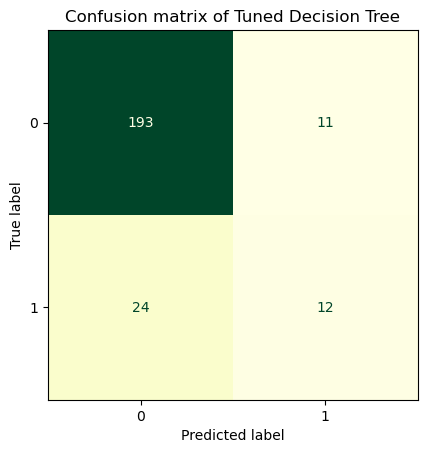

In [220]:
# Tuned model confusion matrix

ConfusionMatrixDisplay.from_estimator(tuned_dt_model_cv, X_test2, y_test2, colorbar= False, cmap= 'YlGn')
plt.title('Confusion matrix of Tuned Decision Tree')
plt.grid(False)


In [221]:
# tuned model classification report

print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       204
           1       0.52      0.33      0.41        36

    accuracy                           0.85       240
   macro avg       0.71      0.64      0.66       240
weighted avg       0.83      0.85      0.84       240



In [222]:
# tuned model performance metrics

tuned_dt_result= metrics_calculator(y_test2, y_pred, 'Tuned Decision Tree')
tuned_dt_result

,Tuned Decision Tree
Accuracy,0.854167
precision,0.521739
Recall,0.333333
F1-score,0.406780


In [223]:
# saving it in a different dataframe for model conclusion report
tuned_dt_result1= pd.DataFrame(data= [0.854167, 0.521739, 0.333333, 0.406780],                            
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned Decision Tree'])
tuned_dt_result1.style.background_gradient(cmap= 'YlGn')

,Tuned Decision Tree
Accuracy,0.854167
precision,0.521739
Recall,0.333333
F1-score,0.406780


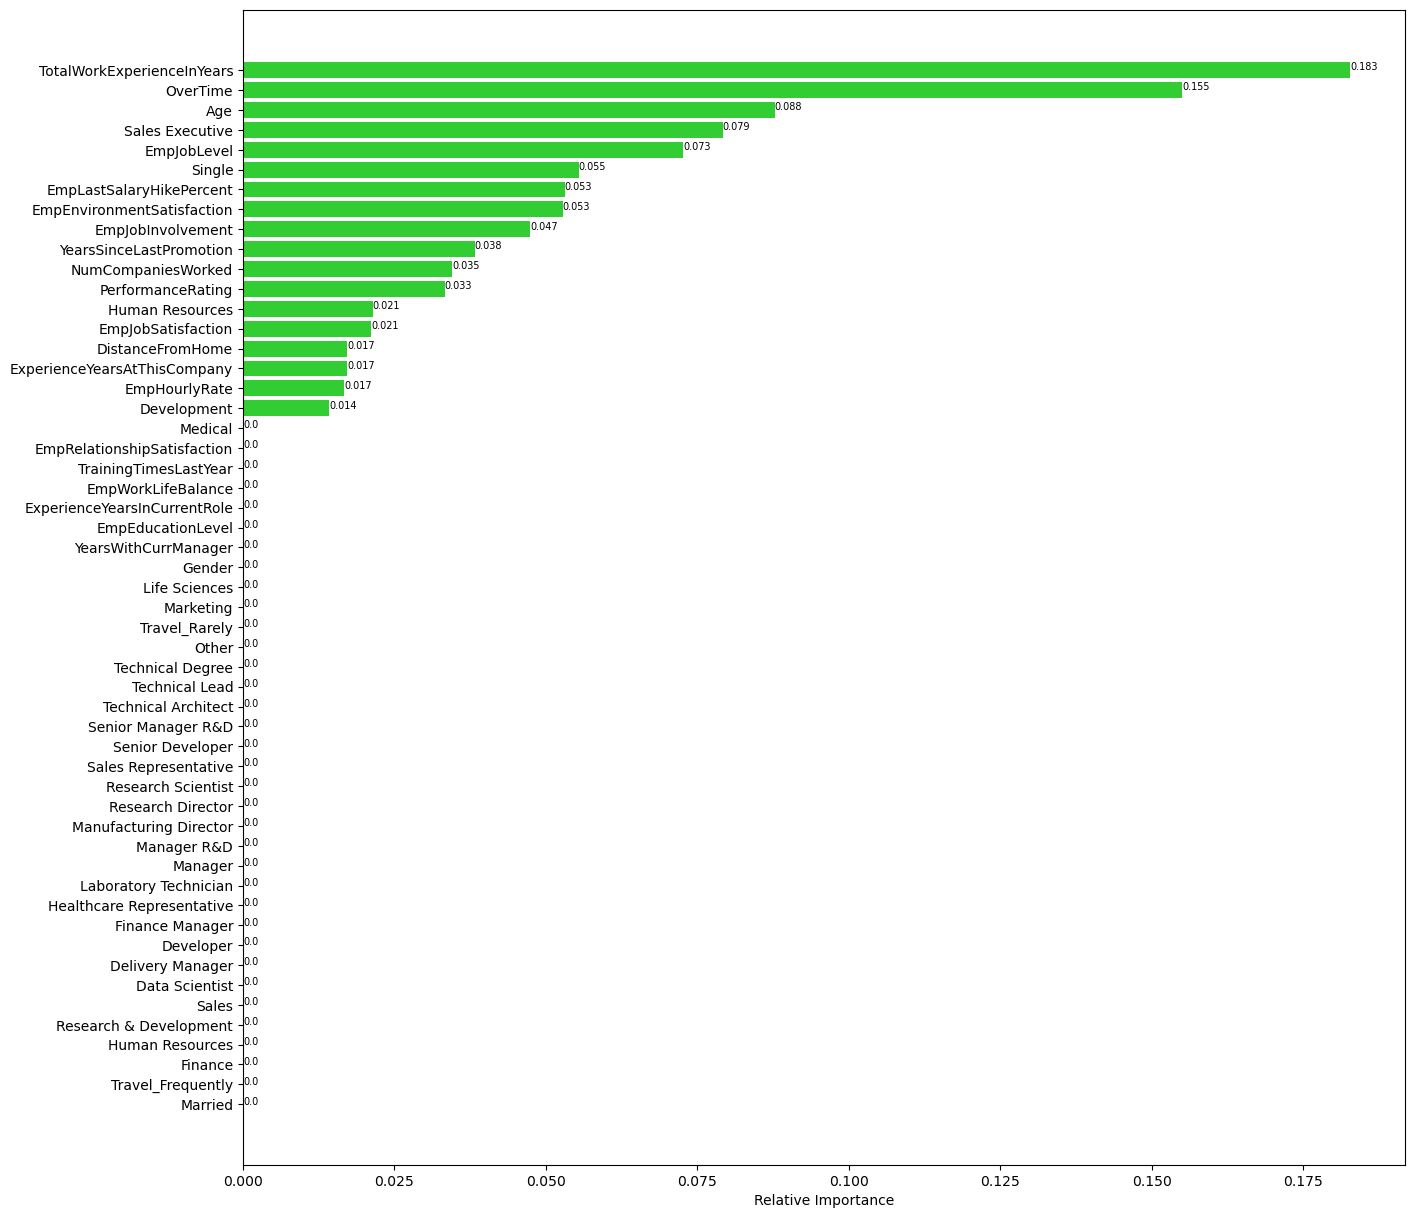

In [224]:
# tuned model feature importance

#getting feature importances from the tuned decision tree model
importances= tuned_dt_model_cv.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'limegreen', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

### **RANDOM FOREST:**

In [225]:
# Splitting features and target variable

X= data.drop('Attrition', axis= 1)
y= data[['Attrition']]

In [226]:
#Checking the shape of X and y

print(f'X: {X.shape}\ny: {y.shape}')

X: (1200, 53)
y: (1200, 1)


In [228]:
# finding the best test size

# Array of test size values from 0.2 to 0.3
test_size= np.arange(start=0.2, stop= 0.35, step= 0.05)

#importing the required libraries for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#Initialising a list to store the score of each test size
score= []

for size in test_size:
  X_train3, X_test3, y_train3, y_test3= train_test_split(X, y, stratify=y, test_size= size, random_state=0)
  rf_model= RandomForestClassifier()
  rf_model.fit(X_train3, y_train3)
  score.append(rf_model.score(X_test3, y_test3))

# Creating a dataframe to display the results
r= pd.DataFrame({'Test size': test_size, 'Score': score })
r.sort_values(by=['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='olivedrab')

,Test size,Score
2,0.300000,0.863889
1,0.250000,0.863333
0,0.200000,0.858333


Hence the test size of **0.3** is the better one for **Random Forest modeling**.

#### ***Train Test Split***

In [229]:
# Splitting x and y into training and testing sets
X_train3, X_test3, y_train3, y_test3= train_test_split(X, y, stratify=y, test_size= 0.3, random_state=0)

In [230]:
# Checking the shape
print(f'X_train shape: {X_train3.shape}\nX_test shape: {X_test3.shape}')
print(f'y_train shape: {y_train3.shape}\ny_test shape: {y_test3.shape}')

X_train shape: (840, 53)
X_test shape: (360, 53)
y_train shape: (840, 1)
y_test shape: (360, 1)


#### ***Training the Random Forest model***

In [231]:
# Initializing the model
rf_model= RandomForestClassifier()

# fitting the model to the train data
rf_model.fit(X_train3, y_train3)

RandomForestClassifier()

In [232]:
# prediction
y_pred= rf_model.predict(X_test3)

In [233]:
# Model Evaluation
# Checking Accuracy score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
a= accuracy_score(y_test3, y_pred)
print(f'Model accuracy score: {a}')

Model accuracy score: 0.8611111111111112


In [235]:
print(f'Precision score: {precision_score(y_test3, y_pred)}\
        \nRecall score: {recall_score(y_test3, y_pred)}\
        \nf1 score: {f1_score(y_test3, y_pred)}')

Precision score: 0.6153846153846154        
Recall score: 0.1509433962264151        
f1 score: 0.24242424242424243


In [236]:
# Checking for overfitting and underfitting

Training_accuracy= rf_model.score(X_train3, y_train3)
Testing_accuracy= rf_model.score(X_test3, y_test3)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 1.0
Testing set score: 0.8611111111111112


The training score is **1.0** and the testing score is **0.86**. The model is thus overfitted.

In [237]:
# K-Fold Cross-validation

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kf= KFold(n_splits= 10, shuffle= False)

In [238]:
# cross validation accuracy

score= cross_val_score(rf_model, X, y, cv= kf, scoring= 'accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.85       0.81666667 0.85       0.85       0.88333333 0.88333333
 0.89166667 0.86666667 0.875      0.88333333]


In [239]:
RF_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
RF_acc

,CV mean,Std
Cross validation accuracy,0.865,0.021985


- The **mean cross validation** of the model is 0.86 which shows that the model is expected to be around **86%** accurate on average.
- Hence it is evident that **10 fold cross validation** accuracy does not show any significant improvement in the model's performance.

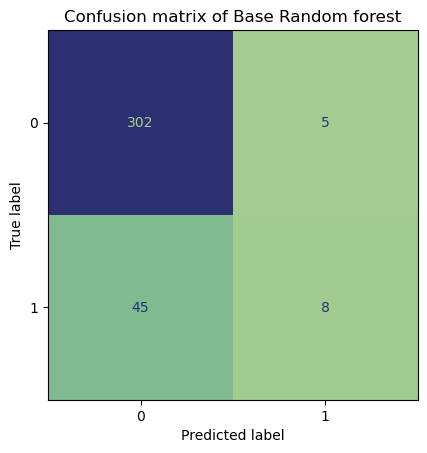

In [240]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model, X_test3, y_test3, colorbar= False, cmap= 'crest')
plt.title('Confusion matrix of Base Random forest')
plt.grid(False)

In [241]:
# classification report

print(classification_report(y_test3, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       307
           1       0.62      0.15      0.24        53

    accuracy                           0.86       360
   macro avg       0.74      0.57      0.58       360
weighted avg       0.83      0.86      0.82       360



In [242]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):


  result= pd.DataFrame(data= [accuracy_score(y_test, y_pred),
                              precision_score(y_test, y_pred),
                              recall_score(y_test, y_pred),
                              f1_score(y_test, y_pred)],
                       index=['Accuracy','precision','Recall', 'F1-score'],
                       columns= [model_name])
  return result

In [243]:
Base_rf_result= metrics_calculator(y_test3, y_pred, 'Base random forest')
Base_rf_result

,Base random forest
Accuracy,0.861111
precision,0.615385
Recall,0.150943
F1-score,0.242424


In [244]:
# saving it in a different dataframe for model conclusion report

Base_dt_result1= pd.DataFrame(data= [ 0.861111, 0.615385, 0.150943, 0.242424], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Base Random forest'])
Base_dt_result1.style.background_gradient(cmap= 'crest')

,Base Random forest
Accuracy,0.861111
precision,0.615385
Recall,0.150943
F1-score,0.242424


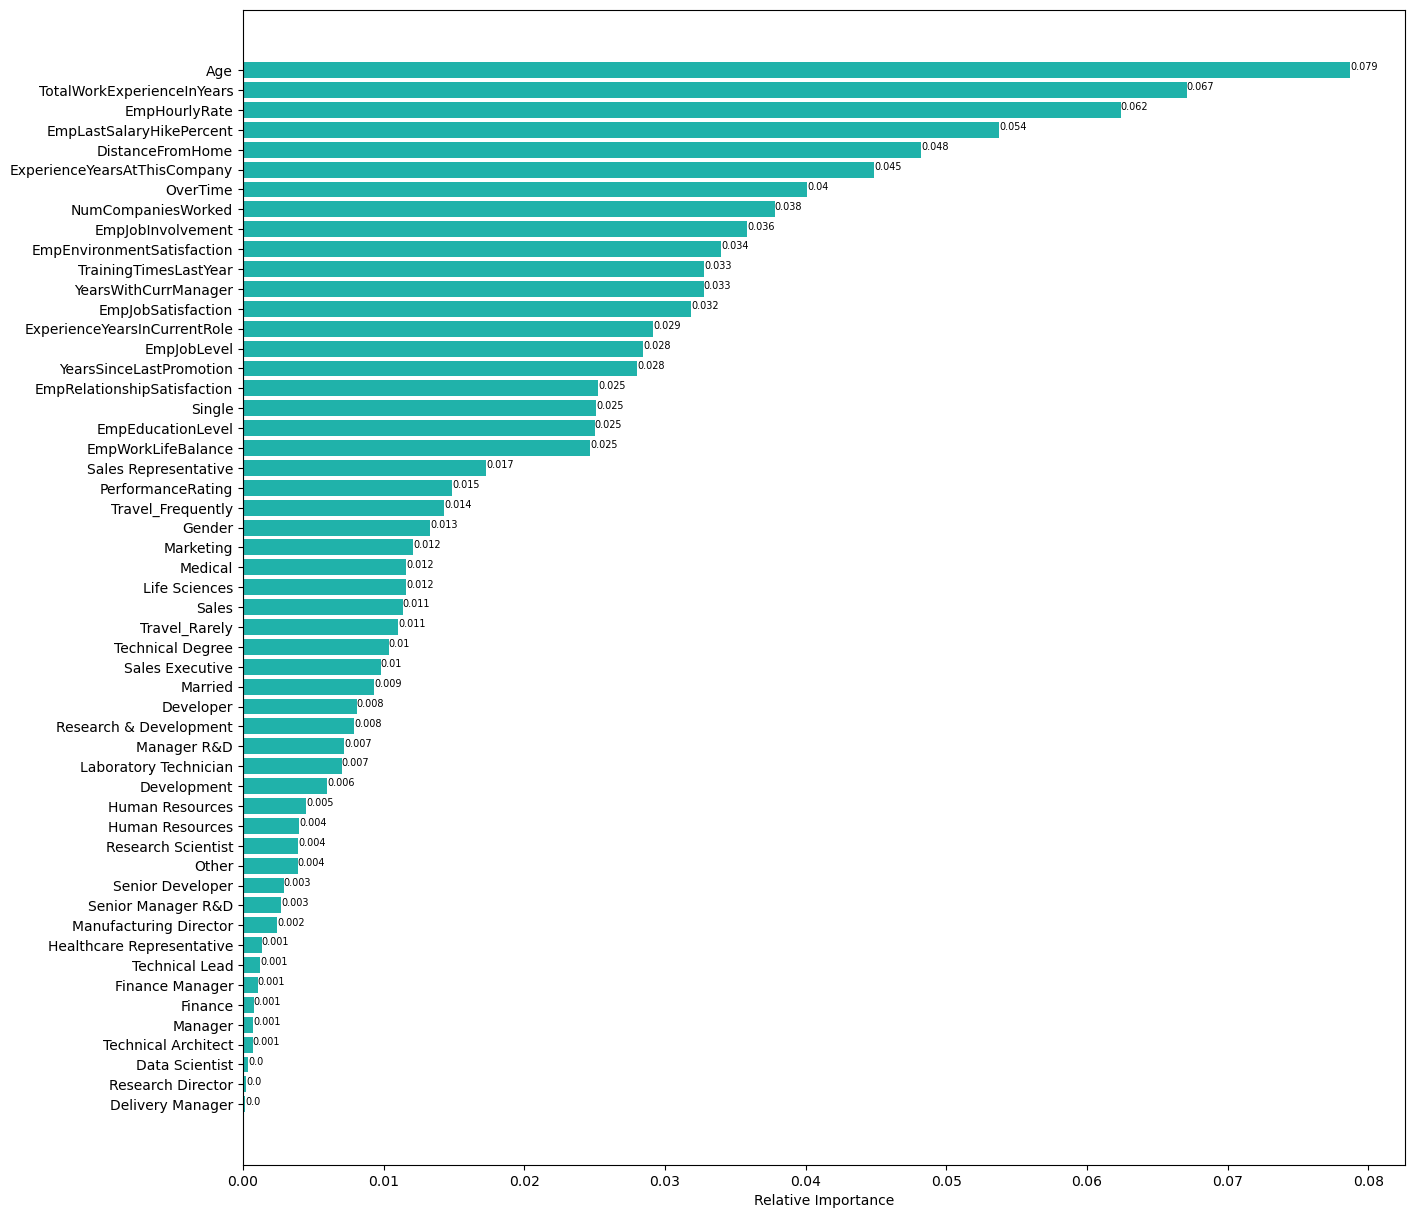

In [245]:
# Random Forest feature importance

#getting feature importances from the random forest model
importances= rf_model.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'lightseagreen', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

#### **TUNING RANDOM FOREST HYPERPARAMETERS USING GRID SEARCH CV**

#### ***Finding optimal hyper parameters (GridSearchCV)***

In [246]:
# Importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Defining model
model = RandomForestClassifier()

# Defining evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats= 3, random_state= 0)

# Defining search parameters
n_estimators= [10, 50, 100, 200]
max_depth= [None, 3, 4, 8, 9, 10, 11, 12]
criterion= ['entropy', 'gini']
max_features= ['sqrt', 'log2']
min_samples_split= [2, 5, 10]
min_samples_leaf= [1, 2, 4]


param_grid= {'n_estimators': n_estimators, 'max_depth': max_depth, 'criterion': criterion,\
             'max_features': max_features, 'min_samples_split': min_samples_split,\
             'min_samples_leaf':min_samples_leaf}

# Defining search
from sklearn.model_selection import GridSearchCV
search= GridSearchCV(model, param_grid, scoring= 'accuracy', n_jobs= -1, cv= cv)


In [247]:
# Executing search
GridSearchCV = search.fit(X_train3, y_train3)

# Setting the classifier to the best combination of parameters
rf_model_cv= GridSearchCV.best_estimator_

# Summarizing the result
print('Best Score: ', GridSearchCV.best_score_)
print('Best hyperparameters: ', GridSearchCV.best_params_)

Best Score:  0.8650793650793651
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


#### ***Tuned Random forest Model and Prediction***

In [248]:
# Training the tuned model

rf_model_cv.fit(X_train3, y_train3)
y_pred= rf_model_cv.predict(X_test3)

#### ***Tuned model evaluation***

In [249]:
# Accuracy score

print(f'Tuned RF model accuracy score:\n {accuracy_score(y_test3, y_pred)}')

Tuned RF model accuracy score:
 0.8555555555555555


In [250]:
print(f'Precision score: {precision_score(y_test3, y_pred)}\
        \nRecall score: {recall_score(y_test3, y_pred)}\
        \nf1 score: {f1_score(y_test3, y_pred)}')

Precision score: 0.5384615384615384        
Recall score: 0.1320754716981132        
f1 score: 0.2121212121212121


In [251]:
# Checking for overfitting and underfitting

Training_accuracy=rf_model_cv.score(X_train3, y_train3)
Testing_accuracy= rf_model_cv.score(X_test3, y_test3)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.9226190476190477
Testing set score: 0.8555555555555555


The training score is **0.92** and the testing score is **0.85**. The model is thus overfitted.

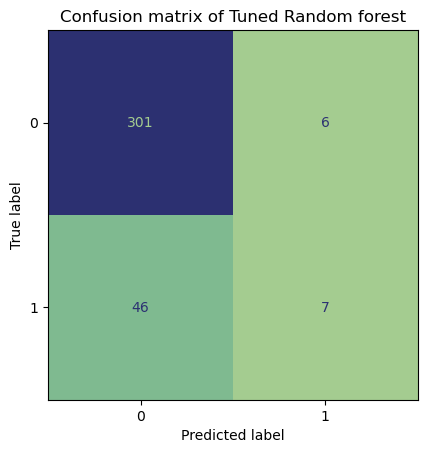

In [252]:
# Tuned model confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_model_cv, X_test3, y_test3, colorbar= False, cmap= 'crest')
plt.title('Confusion matrix of Tuned Random forest')
plt.grid(False)

In [253]:
# tuned model performance metrics

tuned_rf_result= metrics_calculator(y_test3, y_pred, 'Tuned Random Forest')
tuned_rf_result

,Tuned Random Forest
Accuracy,0.855556
precision,0.538462
Recall,0.132075
F1-score,0.212121


In [254]:
# saving it in a different dataframe for model conclusion report
tuned_rf_result1= pd.DataFrame(data= [0.855556, 0.538462, 0.132075, 0.212121],                            
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned Random Forest'])
tuned_rf_result1.style.background_gradient(cmap= 'crest')

,Tuned Random Forest
Accuracy,0.855556
precision,0.538462
Recall,0.132075
F1-score,0.212121


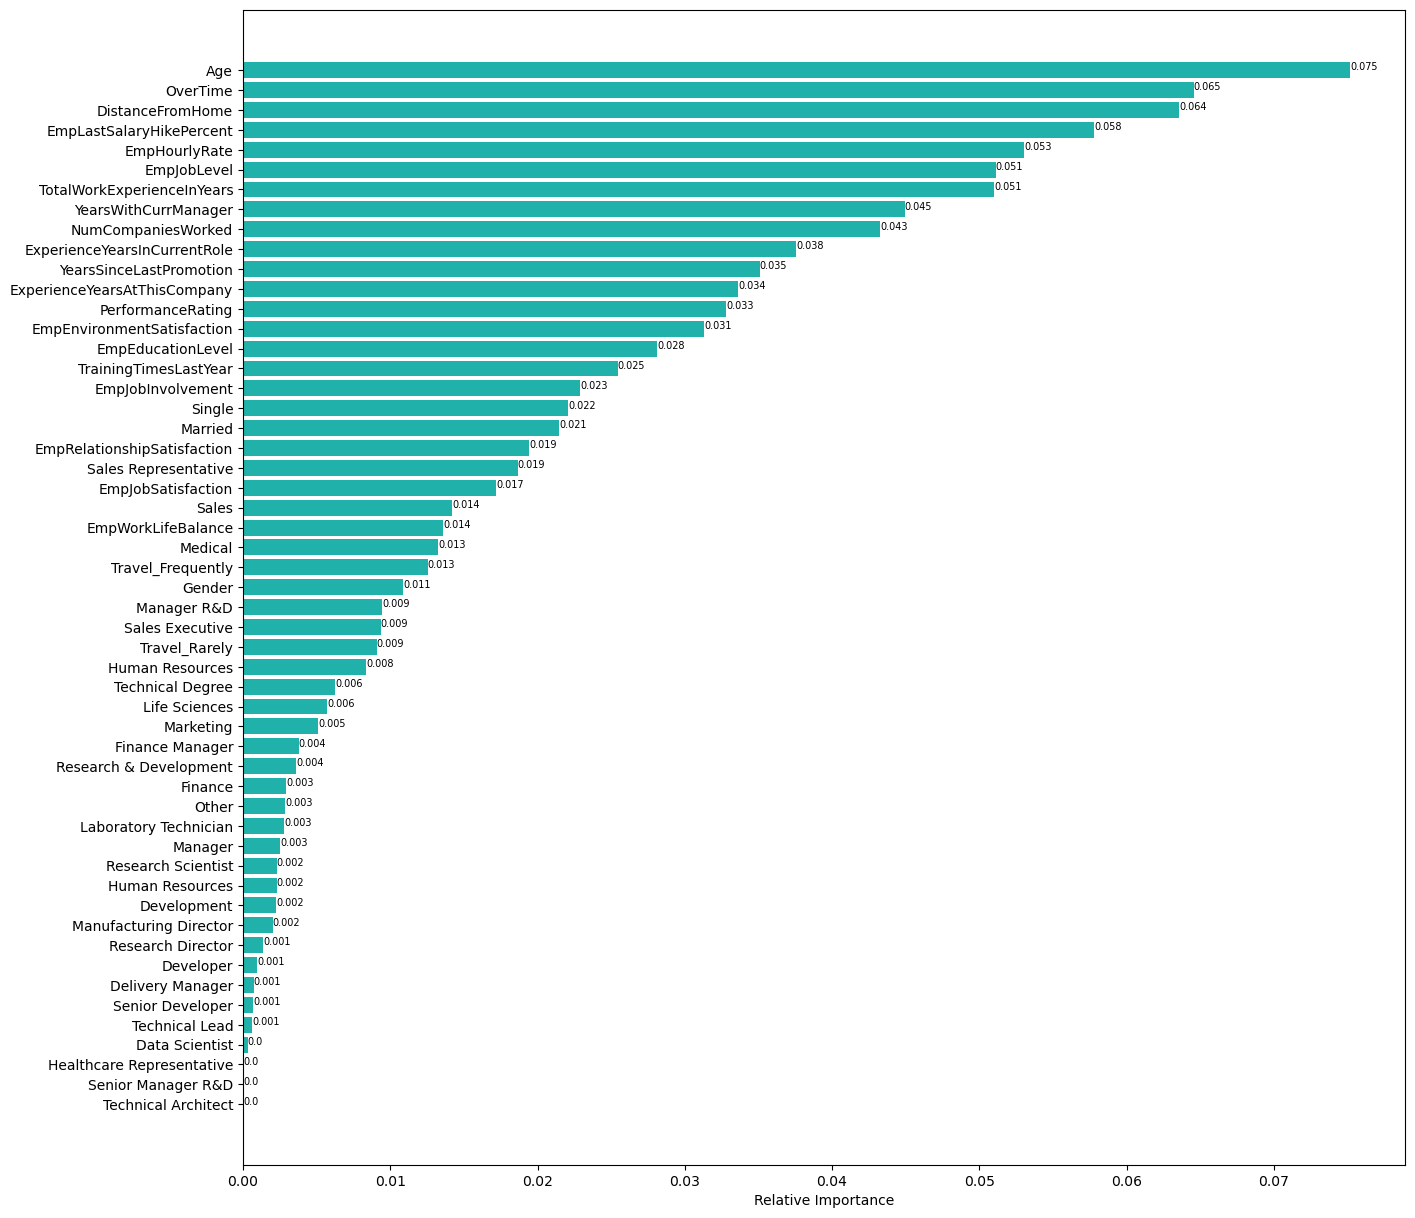

In [255]:
# tuned model feature importance

#getting feature importances from the tuned random forest model
importances= rf_model_cv.feature_importances_
feature_names= X.columns

# sort the features by importance
indices= np.argsort(importances)

# Creating a horizontal bar plot of the feature importances
plt.figure(figsize= (15, 15))
plt.barh(range(len(indices)), importances[indices], color= 'lightseagreen', align= 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Adding labels to the bars
for i, v in enumerate(importances[indices]):
  plt.text(v, i, str(round(v, 3)), color= 'black', fontsize= 7)

plt.show()

#### **XG BOOST**

In [286]:
# Splitting the data 
X= data.drop('Attrition', axis= 1)
y= data[['Attrition']]

In [287]:
#Checking the shape of X and y

print(f'X: {X.shape}\ny: {y.shape}')

X: (1200, 51)
y: (1200, 1)


In [288]:
# Splitting x and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4= train_test_split(X, y, stratify=y, test_size= 0.2, random_state=0)

In [289]:
# Checking the shape
print(f'X_train shape: {X_train4.shape}\nX_test shape: {X_test4.shape}')
print(f'y_train shape: {y_train4.shape}\ny_test shape: {y_test4.shape}')

X_train shape: (960, 51)
X_test shape: (240, 51)
y_train shape: (960, 1)
y_test shape: (240, 1)


In [282]:
data.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Married', 'Single', 'Development', 'Finance', 'HR',
       'Research & Development', 'Sales', 'Data Scientist', 'Delivery Manager',
       'Developer', 'Finance Manager', 'Healthcare Representative', 'HR',
       'Laboratory Technician', 'Manager', 'Manager R&D',
       'Manufacturing Director', 'Research Director', 'Research Scientist',
       'Sales Executive', 'Sales Repr

In [284]:
# Assuming 'index' is the index of the column to be deleted
data.drop(data.columns[31], axis=1, inplace=True)
data.columns

Index(['Age', 'Gender', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree',
       'Married', 'Single', 'Development', 'Finance', 'Research & Development',
       'Sales', 'Data Scientist', 'Delivery Manager', 'Developer',
       'Finance Manager', 'Healthcare Representative', 'Laboratory Technician',
       'Manager', 'Manager R&D', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
      

In [290]:
import xgboost as xg

# creating xgboost classfier
xgboost= xg.XGBClassifier(learning_rate= 0.1)

# Defining a dictionary of hyperparameters to tune
param_grid= {'n_estimators': [10, 50],
             'max_depth': [5, 7],
             'learning_rate': [0.01, 0.1],
             'subsample': [0.6, 0.8, 1],
             'colsample_bytree': [0.6, 0.8, 1.0],
             'gamma': [0, 1, 5]}

# Defining search
from sklearn.model_selection import GridSearchCV
Grid_search= GridSearchCV(estimator= xgboost, param_grid= param_grid, scoring= 'accuracy', n_jobs= -1, cv= 10)

# fit grid search on the data
Grid_search.fit(X_train4, y_train4)

# Setting the classifier to the best combination of parameters
xg_boost= Grid_search.best_estimator_

# Summarizing the result
print('Best hyperparameters:', Grid_search.best_params_)

Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


#### ***Training tuned model and Prediction***

In [291]:
# fit the gradient boosting model on the training set
xg_boost.fit(X_train4, y_train4)

# prediction
y_pred= xg_boost.predict(X_test4)

#### ***model evaluation***

In [292]:
# evaluation

#accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
a= accuracy_score(y_test4, y_pred)
print(f'Accuracy score of the XG boost model: {a}')

Accuracy score of the XG boost model: 0.8708333333333333


In [293]:
print(f'Precision score: {precision_score(y_test4, y_pred)}\
        \nRecall score: {recall_score(y_test4, y_pred)}\
        \nf1 score: {f1_score(y_test4, y_pred)}')

Precision score: 0.7777777777777778        
Recall score: 0.19444444444444445        
f1 score: 0.3111111111111111


In [294]:
# Checking for overfitting and underfitting

Training_accuracy= xg_boost.score(X_train4, y_train4)
Testing_accuracy= xg_boost.score(X_test4, y_test4)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.9583333333333334
Testing set score: 0.8708333333333333


#### Insights:
- The **training set** accuracy score is **0.95** while the **testing set** accuracy score is found to be **0.87**. Even after tuning, the difference is considerably large between training and testing accuracies.

In [295]:
# cross validation score

from sklearn.model_selection import cross_val_score
cross_val_scores= cross_val_score(xg_boost, X_train4, y_train4, cv= 10, scoring= 'accuracy')

print('Cross-validation score of the xg boost Model:', cross_val_scores.mean())

Cross-validation score of the xg boost Model: 0.8875


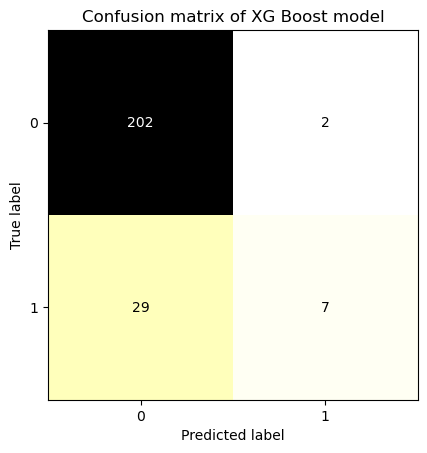

In [297]:
# Tuned model confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(xg_boost, X_test4, y_test4, colorbar= False, cmap= 'afmhot_r')
plt.title('Confusion matrix of XG Boost model')
plt.grid(False)

In [298]:
# tuned model classification report

print(classification_report(y_test4, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       204
           1       0.78      0.19      0.31        36

    accuracy                           0.87       240
   macro avg       0.83      0.59      0.62       240
weighted avg       0.86      0.87      0.84       240



In [299]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test4, y_pred, model_name):


  result= pd.DataFrame(data= [accuracy_score(y_test4, y_pred),
                              precision_score(y_test4, y_pred),
                              recall_score(y_test4, y_pred),
                              f1_score(y_test4, y_pred)],
                       index=['Accuracy','precision','Recall', 'F1-score'],
                       columns= [model_name])
  return result

In [300]:
xg_boost_result= metrics_calculator(y_test4, y_pred, 'Tuned XGBoost')
xg_boost_result

,Tuned XGBoost
Accuracy,0.870833
precision,0.777778
Recall,0.194444
F1-score,0.311111


In [301]:
# saving it in a different dataframe for model conclusion report

xg_boost_result1= pd.DataFrame(data= [ 0.870833, 0.777778, 0.194444, 0.311111], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned XGBoost'])
xg_boost_result1.style.background_gradient(cmap= 'afmhot_r')

,Tuned XGBoost
Accuracy,0.870833
precision,0.777778
Recall,0.194444
F1-score,0.311111
